In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import scipy.signal as signal
from scipy.fft import *

import yfinance as yf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2010-01-04,113.330002
2010-01-05,113.629997
2010-01-06,113.709999
2010-01-07,114.190002
2010-01-08,114.570000


<AxesSubplot:xlabel='Date'>

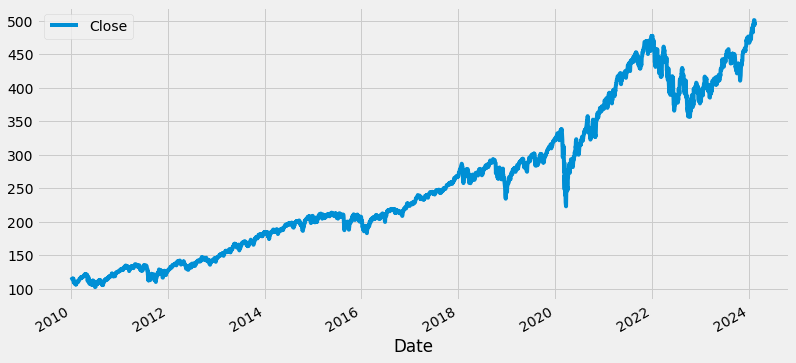

In [2]:
dataset = yf.download("spy","2010-01-01")
df = dataset[['Close']]
df.head()
df.plot(figsize=(12,6))


## Detrend

C:\Users\alik604\AppData\Local\Temp/ipykernel_16812/4089318889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detended'] = data_detrended + df.Close.values[0] # y-shifted


<AxesSubplot:xlabel='Date'>

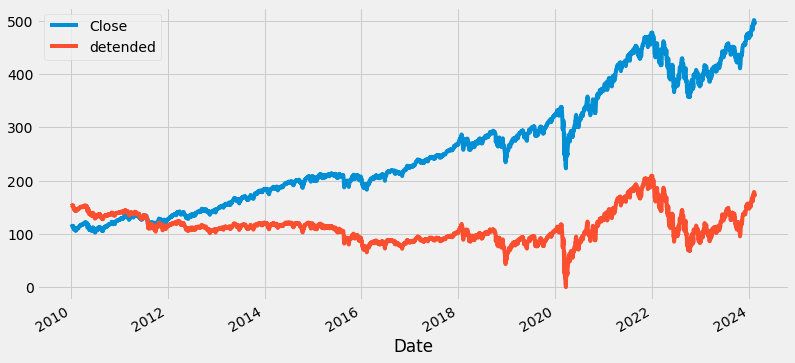

In [3]:
data_detrended = signal.detrend(df.values.flatten())

df['detended'] = data_detrended + df.Close.values[0] # y-shifted
df.plot(figsize=(12,6))

## Discrete Fourier transform via FFT


In [4]:
smoothed = df.Close.rolling(window=3).mean().dropna()
smoothed = smoothed.values

# use only real numbers... 
# data_fft = fft(smoothed, workers=-1)
data_fft = rfft(smoothed, workers=-1)
data_fft[:10]

array([906369.47695923     +0.j        ,  42866.40401941+204430.43101775j,
        -4436.55715211+119297.38032621j,  -9079.49942062 +66621.97534368j,
        -6303.29690619 +18215.16012622j,  15552.74529498 +28975.4603716j ,
        17157.84901985 +33478.06968343j,   6532.28849835 +41597.05781045j,
        -3256.92323139 +34558.06327067j,  -3443.10130301 +21714.15008618j])

<Figure size 864x432 with 0 Axes>

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


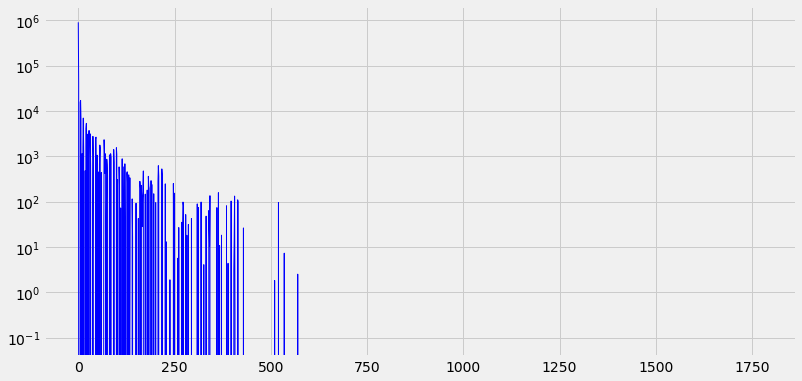

<Figure size 864x432 with 0 Axes>

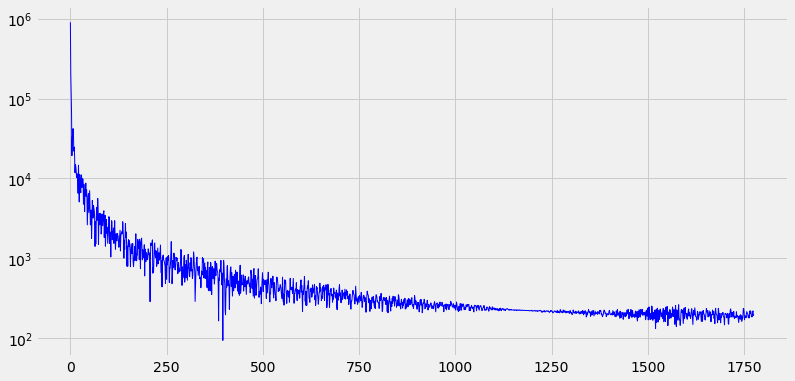

In [5]:
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

<Figure size 864x432 with 0 Axes>

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'data_fft')

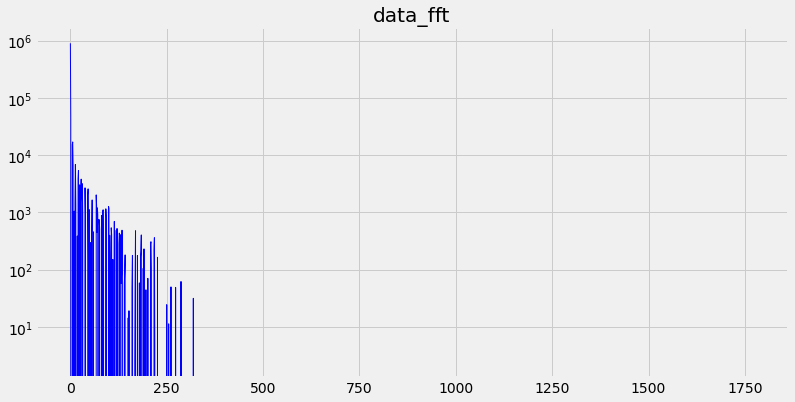

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'abs(data_fft)')

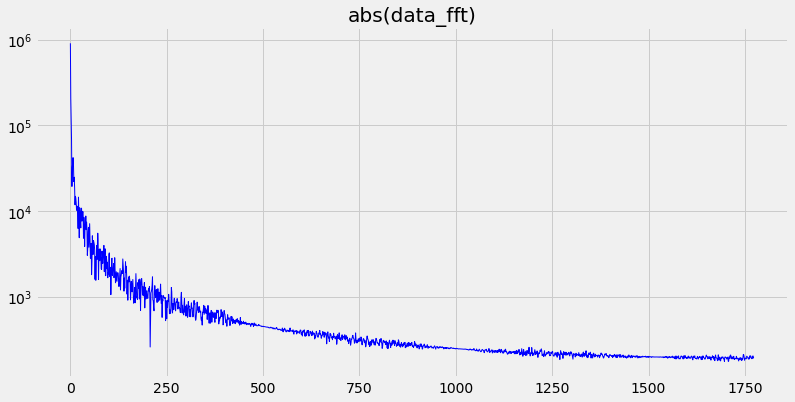

In [6]:
smoothed = df.Close.rolling(window=7).mean().dropna()
smoothed = smoothed.values

# use only real numbers... 
# data_fft = fft(smoothed, workers=-1)
data_fft = rfft(smoothed, workers=-1)

plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.title('data_fft')
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.title('abs(data_fft)')
plt.show()

<Figure size 864x432 with 0 Axes>

c:\Users\alik604\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


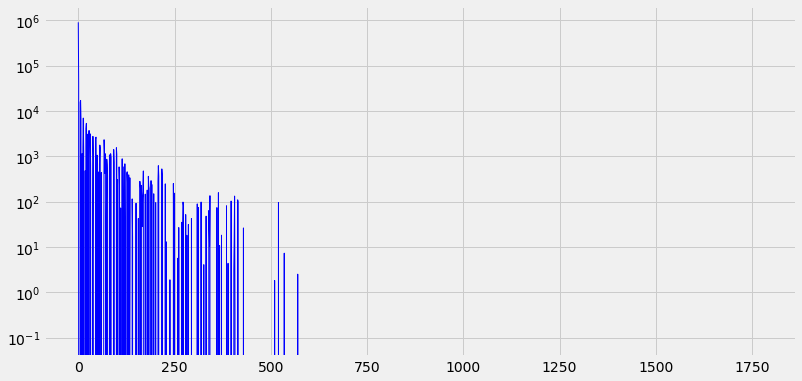

<Figure size 864x432 with 0 Axes>

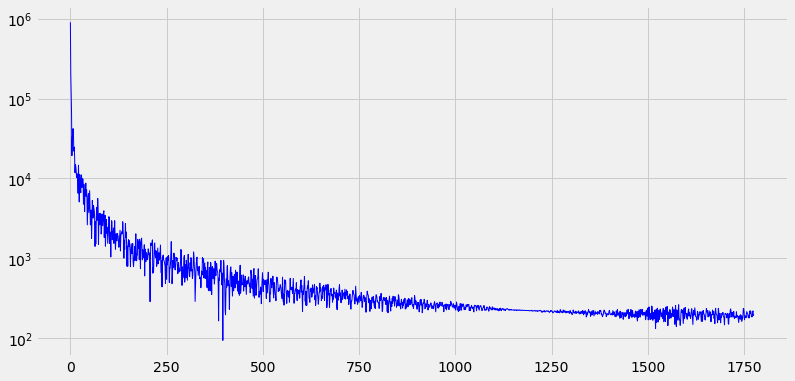

In [7]:
smoothed = df.Close.rolling(window=3).mean().dropna()
smoothed = smoothed.values # to NP array

data_fft = rfft(smoothed, workers=-1)
plt.figure(figsize=(12,6))
plt.semilogy(data_fft, '-b', linewidth = 1.0)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogy(abs(data_fft), '-b', linewidth = 1.0)
plt.show()

In [8]:
# np.sort(np.abs(data_fft))[::-1][:10]

<AxesSubplot:xlabel='Date'>

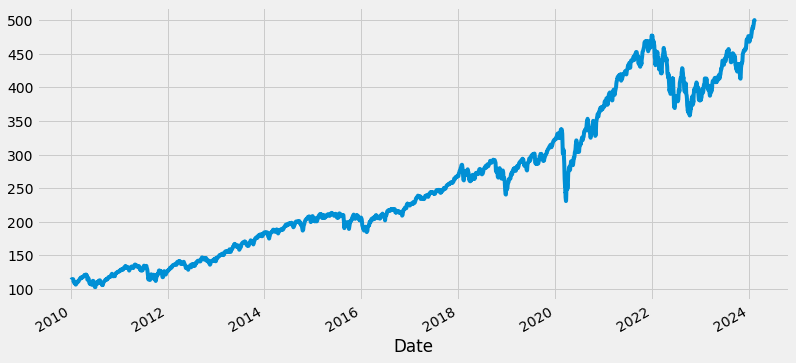

In [9]:
df.Close.rolling(window=3).mean().dropna().plot(figsize=(12,6))

### FFT of daily change

<AxesSubplot:xlabel='Date'>

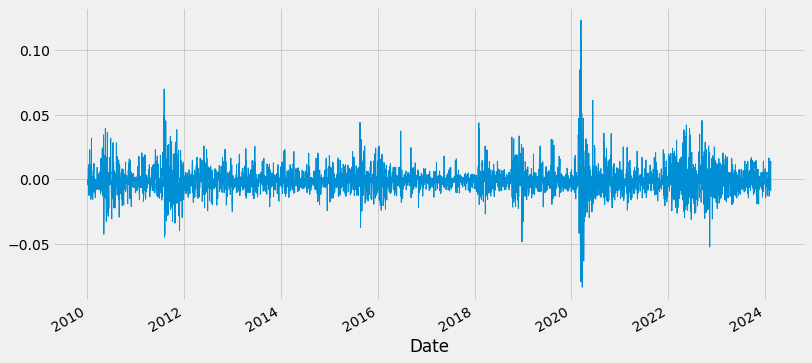

In [10]:
daily_change = df.Close / df.Close.shift(-1)- 1
daily_change.plot(figsize=(12,6),linewidth = 1.0)
daily_change = daily_change.values

<Figure size 864x432 with 0 Axes>

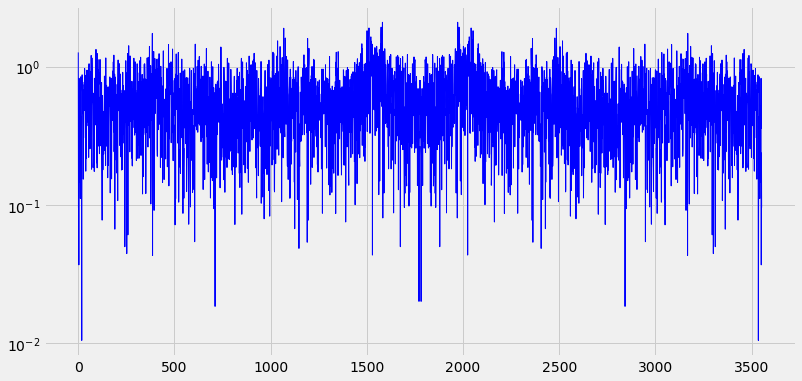

In [11]:
daily_change[np.isnan(daily_change)] = 0
daily_change_fft = fft(daily_change)

plt.figure(figsize=(12,6))
plt.semilogy(abs(daily_change_fft), '-b', linewidth = 1.0)
plt.show()

## Power Spectral Density

> The power spectral density, PSD, describes how the power of your signal is distributed over frequency whilst the DFT shows the spectral content of your signal, the amplitude and phase of harmonics in your signal.

> You pick one or the other depending on what you want to observe/analyze. And no they're not the same as you can see from the equations above and links given. Their spectra are generally not the same. One is estimated as the squared magnitude of the other.


<Figure size 864x432 with 0 Axes>

Text(0.5, 0, 'frequency [Hz]')

Text(0, 0.5, 'PSD [V**2/Hz]')

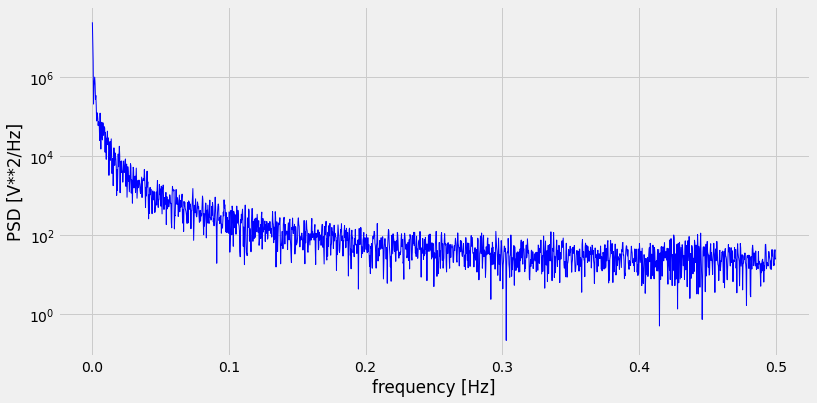

In [12]:
freq, psd = signal.periodogram(df.Close)

plt.figure(figsize=(12,6))
plt.semilogy(freq[1:],psd[1:], '-b', linewidth = 1.0)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()